## 1. Import Library & Melakukan Eksplorasi Dataset dengan Pandas

In [61]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
# Read dataset
data_april = pd.read_csv("volume-pengangkutan-sampah-di-kali-sungai-situ-waduk-bulan-april-tahun-2021.csv", 
                         encoding="latin-1")
data_april.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
0,4,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,3
1,4,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,3
2,4,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,3
3,4,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,3
4,4,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,4


In [63]:
# Melihat total data pada masing-masing kolom di dalam dataframe
data_april.count()

bulan                        53100
 titik_lokasi                53100
 kecamatan                   53100
 wilayah                     53100
 panjang/luas                52170
satuan_panjang/luas          32460
tanggal                      53100
volume_sampah_perhari(m3)    53100
dtype: int64

In [64]:
# Melihat tipe data dari masing-masing kolom yang ada di dalam dataframe
data_april.dtypes

bulan                         int64
 titik_lokasi                object
 kecamatan                   object
 wilayah                     object
 panjang/luas                object
satuan_panjang/luas          object
tanggal                       int64
volume_sampah_perhari(m3)    object
dtype: object

In [65]:
# Melihat nama kolom yang ada di dalam dataframe
data_april.columns

Index(['bulan', ' titik_lokasi ', ' kecamatan ', ' wilayah ', ' panjang/luas ',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [66]:
# Melihat jumlah rows dan kolom pada dataframe
data_april.shape

(53100, 8)

In [67]:
# Melihat info dataset (tipe data, total record data, dll)
data_april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53100 entries, 0 to 53099
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      53100 non-null  int64 
 1    titik_lokasi              53100 non-null  object
 2    kecamatan                 53100 non-null  object
 3    wilayah                   53100 non-null  object
 4    panjang/luas              52170 non-null  object
 5   satuan_panjang/luas        32460 non-null  object
 6   tanggal                    53100 non-null  int64 
 7   volume_sampah_perhari(m3)  53100 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.2+ MB


In [68]:
# Menghapus jarak spasi pada kolom dataset
data_april.columns = data_april.columns.str.replace(" ", "")

In [69]:
# Melihat nilai statistik deskriptif dari dataframe untuk keseluruhan kolom
data_april.describe(include="all")

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
count,53100.0,53100,53100,53100,52170,32460,53100.000000,53100
unique,NaN,1764,42,5,421,10,NaN,84
top,NaN,PHB Pramuka,Kalideres,Jakarta Barat,1000,m,NaN,-
freq,NaN,60,2850,16080,6450,30810,NaN,15656
mean,4.0,NaN,NaN,NaN,NaN,NaN,15.500000,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,8.655523,NaN
min,4.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,4.0,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
50%,4.0,NaN,NaN,NaN,NaN,NaN,15.500000,NaN
75%,4.0,NaN,NaN,NaN,NaN,NaN,23.000000,NaN


Hasil keluaran diatas menandakan beberapa nilai-nilai dari statistik deskriptif dari kedua jenis data yakni numerik (tipe data int & float) dan kategorik (tipe data object/string) dan tentu saja setiap jenis data memiliki nilai deskriptif yang berbeda. Seperti misalnya jenis data numerik memiliki nilai deskriptif seperti count, mean, std (standard deviasi), maximum, minimum, quartil 1 (25%), quartil 2/median (50%) dan quartil 3 (75%). Sedangkan jenis data kategorik memiliki nilai deskriptif seperti count, unique, top dan freq (frekuensi data).

Sebagai contoh dapat dilihat pada penjelasan dibawah ini:

- Pada kolom titik_lokasi tidak memiliki nilai mean, standard deviasi, min, dll, tetapi memiliki nilai top, unique, freq, dll. Hal tersebut dikarenakan kolom titik_lokasi bersifat kategorik (karena memiliki tipe data string). Maka dari itu kolom titik_lokasi memiliki nilai top yakni Saluran PHB Pertanian, nilai freq adalah 60, dst.

- Sedangkan pada kolom tanggal tidak memiliki nilai top, freq, dll tetapi memiliki nilai mean, standard deviasi, min, max, dll. Hal tersebut dikarenakan kolom tanggal bersifat numerik. Hal ini dapat dilihat dari nilai mean pada kolom tanggal adalah 15.5, nilai max adalah 30, nilai quartil 3 adalah 23, dst.

Berikut adalah kolom-kolom yang bersifat kategorik dan numerik:

- Kategorik: titik_lokasi, kecamatan, wilayah, panjang/luas, satuan_panjang/luas dan volume_sampah_perhari(m3).
- Numerik: bulan dan tanggal.

In [70]:
"""
Menghitung nilai dari beberapa kolom (kecamatan, wilayah, satuan_panjang/satuan) 
dari yang sering muncul - tidak sering muncul di dalam dataframe
"""
print(data_april["kecamatan"].value_counts())
print()

print(data_april["wilayah"].value_counts())
print()

print(data_april["satuan_panjang/luas"].value_counts())

Kalideres            2850
Tanjung Priok        2820
Penjaringan          2670
Cilincing            2460
Cengkareng           2460
Grogol Petamburan    2250
Kembangan            2250
Cakung               2190
Tamansari            1890
Pademangan           1830
Kebon Jeruk          1530
Tambora              1500
Kelapa Gading        1440
Palmerah             1350
Koja                 1350
Jatinegara           1320
Pulo Gadung          1290
Duren Sawit          1260
Jagakarsa            1170
Pasar Rebo           1110
Kramat Jati          1080
Makasar               990
Ciracas               960
Matraman              930
Gambir                900
Tanah Abang           870
Pancoran              840
Pasar Minggu          810
Kebayoran Baru        810
Cilandak              810
Kebayoran Lama        780
Setiabudi             750
Tebet                 720
Mampang Prapatan      690
Cipayung              630
Pesanggrahan          600
Sawah Besar           540
Cempaka Putih         510
Kemayoran   

In [71]:
# Mengubah nama kolom dari yang semula "panjang/luas" dan "satuan_panjang/luas" menjadi "panjang_luas" dan "satuan_panjang"
rename_column_data = data_april.rename(columns={"panjang/luas": "panjang_luas", "satuan_panjang/luas":"satuan_panjang"})

rename_column_data.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang_luas',
       'satuan_panjang', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [72]:
# Memisahkan semua data yang memiliki satuan_panjang = km dan ditampilkan sebanyak 10 data teratas
data_km = rename_column_data[rename_column_data.satuan_panjang == "km"]
data_km.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
1487,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,1,2
3257,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,2,-
5027,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,3,-
6797,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,4,-
8567,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,5,2
10337,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,6,-
12107,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,7,-
13877,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,8,-
15647,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,9,-
17417,4,Kali Ciliwung KOPASSUS,Pasar Rebo,Jakarta Timur,7,km,10,4


In [73]:
# Memisahkan semua data yang memiliki panjang_luas = 600/3 dan ditampilkan sebanyak 8 baris data terakhir
data_panjang_luas = rename_column_data[rename_column_data.panjang_luas == "600/3"]
data_panjang_luas.tail(8)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
50067,4,PHB Atmajaya,Penjaringan,Jakarta Utara,600/3,NaN,29,0
51552,4,PHB Pure Dewaruci Kel. Semper Barat,Cilincing,Jakarta Utara,600/3,NaN,30,0
51559,4,PHB Grandong Jl Bakti VI Samping Kantor Kel. C...,Cilincing,Jakarta Utara,600/3,NaN,30,0
51633,4,PHB Rawa Badak Utara,Koja,Jakarta Utara,600/3,NaN,30,0
51741,4,PHB Trio Ruas Warakas Raya Kel. Warakas,Tanjung Priok,Jakarta Utara,600/3,NaN,30,0
51751,4,PHB Pasar Kober,Tanjung Priok,Jakarta Utara,600/3,NaN,30,0
51819,4,Kali Gendong Pabrik Benang,Penjaringan,Jakarta Utara,600/3,NaN,30,0
51837,4,PHB Atmajaya,Penjaringan,Jakarta Utara,600/3,NaN,30,0


In [74]:
# Memisahkan semua data yang memiliki kecamatan = Gambir dari 10 data teratas
data_gambir = rename_column_data[rename_column_data.kecamatan == "Gambir"]
data_gambir.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari(m3)
30,4,Kali / Sungai Ciliwung Ruas Veteran,Gambir,Jakarta Pusat,2000,m,1,2
31,4,Kali / Sungai Ciliwung Ruas Pejambon,Gambir,Jakarta Pusat,1000,m,1,0
32,4,Kali / Sungai Ciliwung Ruas Belakang Kemenkeu,Gambir,Jakarta Pusat,1000,m,1,0
33,4,Kali / Sungai Ciliwung Ruas Pintu Istiqlal,Gambir,Jakarta Pusat,700,m,1,0
34,4,Kali / Sungai Ciliwung Ruas jl Perwira,Gambir,Jakarta Pusat,800,m,1,0
35,4,Kali / Sungai Cideng Ruas Siantar,Gambir,Jakarta Pusat,900,m,1,0
36,4,Kali / Sungai Cideng Ruas Zainul Arifin,Gambir,Jakarta Pusat,950,m,1,12
37,4,Kali / Sungai Cideng Ruas Holand Bakeri,Gambir,Jakarta Pusat,950,m,1,12
38,4,Kali / Sungai Cideng Ruas Tarakan,Gambir,Jakarta Pusat,800,m,1,12
39,4,Kali / Sungai Cideng Ruas Jembatan MCDonald's,Gambir,Jakarta Pusat,1000,m,1,2


In [75]:
# Melihat susunan dataframe dari 5 data terbawah
data_april.tail()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
53095,4,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,30,3
53096,4,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,30,-
53097,4,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,30,-
53098,4,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,30,-
53099,4,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,30,-


## 2. Data Preprocessing

In [76]:
# Mengecek apakah di dalam dataframe terdapat nilai duplikat/tidak
data_april.duplicated().sum()

0

In [77]:
# Mengubah format penamaan kolom dari yang semula huruf kecil menjadi huruf gabungan (huruf besar & kecil)
data_april = data_april.rename(str.title, axis="columns")
data_april.columns

Index(['Bulan', 'Titik_Lokasi', 'Kecamatan', 'Wilayah', 'Panjang/Luas',
       'Satuan_Panjang/Luas', 'Tanggal', 'Volume_Sampah_Perhari(M3)'],
      dtype='object')

In [78]:
# Mengecek nilai kosong (NaN) dari masing-masing kolom di dataframe
data_april.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                   930
Satuan_Panjang/Luas          20640
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Jika dilihat dari hasil diatas maka hanya terdapat 2 kolom yang memiliki nilai NaN (Not a Number) atau nilai kosong yaitu kolom "Panjang/Luas" dan "Satuan_Panjang/Luas". Namun jika diperhatikan kembali terdapat 3 kolom yang memiliki nilai NaN yakni kolom "Panjang/Luas", "Satuan_Panjang/Luas", dan kolom "Volume_Sampah_Perhari(M3)".

Mengapa terdapat kolom "Volume_Sampah_Perhari(M3)"?

Hal tersebut dikarenakan nilai kosong yang ada di kolom "Volume_Sampah_Perhari(M3)" ditulis dengan simbol "-". Karena kolom ini merupakan kolom prediksi maka dari itu saya akan mengubahnya menjadi nilai mean atau nilai rata-rata. Tetapi sebelum itu nilai "-" ini akan saya ubah terlebih dahulu menjadi nilai NaN (Not a Number).

In [79]:
# Menghapus karakter yang berada di kolom "Panjang/Luas" seperti pada data 700/10 yang dapat dilihat pada tahapan sebelumnya
data_april["Panjang/Luas"] = data_april["Panjang/Luas"].str.replace(r"\D", "")

In [80]:
# Mengahapus karakter "-" di kolom "Volume_Sampah_Perhari(M3)" dengan nilai NaN
data_april["Volume_Sampah_Perhari(M3)"] = data_april["Volume_Sampah_Perhari(M3)"].replace("-", np.nan)

data_april.tail(10)

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
53090,4,Waduk Aneka Elok,Cakung,Jakarta Timur,700,m,30,NaN
53091,4,PHB Aneka Elok,Cakung,Jakarta Timur,600,m,30,NaN
53092,4,PHB KP Bulak Penggilingan,Cakung,Jakarta Timur,800,m,30,NaN
53093,4,Kali Cakung Drain (Jl. Raya Bekasi-Lion),Cakung,Jakarta Timur,1000,m,30,3
53094,4,Kali Cakung Drain (Lion-Wing's),Cakung,Jakarta Timur,800,m,30,3
53095,4,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,30,3
53096,4,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,30,NaN
53097,4,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,30,NaN
53098,4,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,30,NaN
53099,4,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,30,NaN


In [81]:
# Mengubah tipe data di kolom "Panjang/Luas" dari string menjadi float
data_april[["Panjang/Luas"]] = data_april[["Panjang/Luas"]].apply(pd.to_numeric)

In [82]:
# Mengubah tipe data pada kolom "Volume_Sampah_Perhari(M3)" dari string menjadi float
data_april["Volume_Sampah_Perhari(M3)"] = pd.to_numeric(data_april["Volume_Sampah_Perhari(M3)"], errors="coerce")

data_april.dtypes

Bulan                          int64
Titik_Lokasi                  object
Kecamatan                     object
Wilayah                       object
Panjang/Luas                 float64
Satuan_Panjang/Luas           object
Tanggal                        int64
Volume_Sampah_Perhari(M3)    float64
dtype: object

In [83]:
# Melihat nilai total dari masing-masing data yang ada di kolom "Satuan_Panjang/Luas"
data_april["Satuan_Panjang/Luas"].value_counts()

m         30810
Ha         1320
H            90
HA           60
km           30
m2           30
m³           30
m²           30
hektar       30
Hektar       30
Name: Satuan_Panjang/Luas, dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa nilai data hektar (yang dilambangkan dengan Ha) memiliki banyak sekali penulisan yang berbeda-beda seperti H, HA, Hektar, dan hektar. Padahal semuanya memiliki satu kesatuan yaitu Ha. Maka dari itu saya akan menjadikan nilai data H, HA, Hektar, dan hektar ini menjadi satu kesatuan saja yakni data Ha.

Selain itu nilai dari data seperti m2 akan saya jadikan sebagai nilai m² saja.

In [84]:
# Mengganti nilai data yang mirip seperti Ha, dan m²

# Mengganti nilai H", "HA". "Hektar", dan "hektar"
data_april = data_april.replace(to_replace =["H", "HA", "Hektar", "hektar"], value="Ha")

# Mengganti nilai "m2" menjadi "m²"
data_april = data_april.replace(to_replace = "m2", value="m²")

data_april["Satuan_Panjang/Luas"].value_counts()

m     30810
Ha     1530
m²       60
km       30
m³       30
Name: Satuan_Panjang/Luas, dtype: int64

In [85]:
# Mengecek kembali nilai NaN di masing-masing kolom yang ada di dataframe
data_april.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                   930
Satuan_Panjang/Luas          20640
Tanggal                          0
Volume_Sampah_Perhari(M3)    17852
dtype: int64

In [86]:
# Mengganti nilai NaN yang ada disetiap kolom di dataframe data_maret dengan nilai mean
mean = data_april.mean()
data_april = data_april.replace(np.nan, mean)

data_april.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                     0
Satuan_Panjang/Luas          20640
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Setelah mengisi nilai kosong (NaN) dengan nilai mean (rata-rata) selanjutnya saya akan mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari yang semula float menjadi integer.

In [87]:
# Mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari float menjadi integer
data_april["Panjang/Luas"] = data_april["Panjang/Luas"].astype(int)
data_april["Volume_Sampah_Perhari(M3)"] = data_april["Volume_Sampah_Perhari(M3)"].astype(int)

data_april.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
53095,4,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,30,3
53096,4,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,30,2
53097,4,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,30,2
53098,4,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,30,2
53099,4,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,30,2


In [88]:
# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR
Q1 = data_april["Panjang/Luas"].quantile(0.25)
Q3 = data_april["Panjang/Luas"].quantile(0.75)

# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)
IQR = Q3 - Q1

# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang
print("Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang: ", data_april.shape)

# Menghapus nilai outlier dari kolom "Panjang/Luas"
data_april = data_april[~((data_april["Panjang/Luas"] < (Q1 - 1.5 * IQR)) | 
                          (data_april["Panjang/Luas"] > (Q3 + 1.5 * IQR)))]

# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"
print("Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang: ", data_april.shape)

Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang:  (53100, 8)
Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang:  (42870, 8)


Terdapat 10.230 nilai outliers yang ada di kolom "Panjang/Luas" yang ada di dalam dataframe. Walaupun kolom "Panjang/Luas" tidak akan digunakan dalam proses prediksi tingkat pengangkutan volume sampah (kolom "Panjang/Luas" tidak termasuk ke dalam variabel independen maupun variabel dependen) tetapi penghapusan nilai outliers ini tetap saya lakukan karena pada tahap data visualisasi akan saya gunakan untuk melihat presentase berdasarkan wilayah dan juga melihat perbandingan data berdasarkan kolom "Satuan_Panjang/Luas".

In [89]:
# Menghapus kolom yang sudah tidak dibutuhkan yaitu kolom "Bulan"
data_april = data_april.drop(["Bulan"], axis=1)

## 3. Data Visualisasi + Analisis Data per Grafik

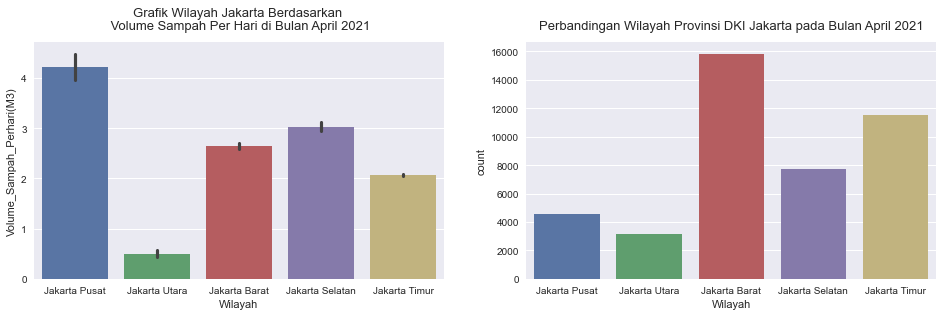

In [90]:
# Melihat perbandingan antar wilayah di Provinsi DKI Jakarta (berdasarkan volume sampah per hari)
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
sns.barplot(x="Wilayah", y="Volume_Sampah_Perhari(M3)", data=data_april)
plt.title("Grafik Wilayah Jakarta Berdasarkan \n Volume Sampah Per Hari di Bulan April 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
sns.countplot(x="Wilayah", data=data_april)
plt.title("Perbandingan Wilayah Provinsi DKI Jakarta pada Bulan April 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diagram diatas maka dapat diambil beberapa kesimpulan diantaranya:

1. Wilayah Jakarta Pusat memiliki volume sampah yang paling tinggi diantara wilayah yang lain sedangkan Wilayah Jakarta Utara memiliki tingkat volume pengangkutan sampah yang sangat kecil dan sedikit. Jika diurutkan dalam hal volume sampah yang berhasil diangkut di setiap wilayah yang ada di Provinsi DKI Jakarta maka akan terjadi susunan seperti dibawah ini:

- Jakarta Pusat.
- Jakarta Selatan.
- Jakarta Barat.
- Jakarta Timur.
- Jakarta Utara.

2. Grafik kedua merupakan grafik yang memperlihatkan perbandingan Wilayah yang ada di Provinsi DKI Jakarta tanpa adanya keterkaitan atau hubungan wilayah dengan kegiatan pengangkutan sampah di setiap harinya. Wilayah Jakarta Barat memiliki nilai yang sangat tinggi yakni mencapai 15.840 sedangkan Wilayah Jakarta Utara memiliki nilai perhitungan yang sangat kecil yakni hanya mencapai 3.180 saja. Jika diurutkan maka hasilnya adalah sebagai berikut:

- Jakarta Barat.
- Jakarta Timur.
- Jakarta Selatan.
- Jakarta Pusat.
- Jakarta Utara.

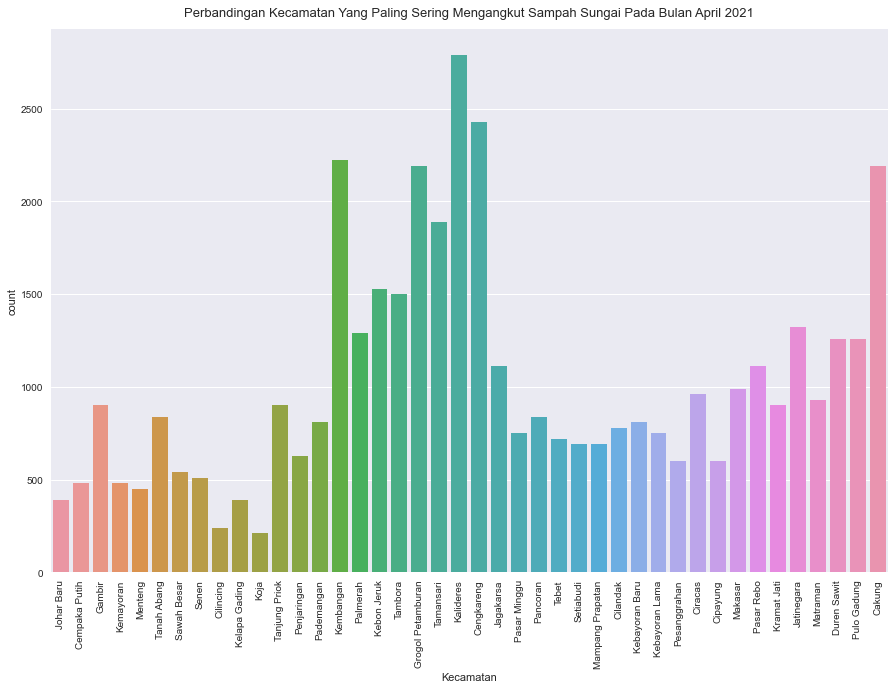

In [91]:
# Melihat perbandingan antar kecamatan dalam hal pengangkutan sampah yang ada di Provinsi DKI Jakarta
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)

sns.countplot(x="Kecamatan", data=data_april)
plt.title("Perbandingan Kecamatan Yang Paling Sering Mengangkut Sampah Sungai Pada Bulan April 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diatas terkait perbandingan jumlah perhitungan total antar Kecamatan yang didasari oleh kolom Titik_Lokasi dalam menghasilkan atau mengumpulkan volume sampah per harinya di Provinsi DKI Jakarta bulan April 2021, maka dapat diambil kesimpulan sebagai berikut:

1. Kecamatan yang mempunyai nilai tertinggi yakni Kecamatan Kalideres yang memiliki data sebanyak 2.790. Jumlah nilai tersebut tidak ada keterkaitannya dengan volume sampah per harinya melainkan didasarkan atas Titik_Lokasi dari setiap Kecamatan yang berhasil mengangkut sampah-sampah di setiap harinya.
2. Kecamatan yang memiliki nilai tertinggi selanjutnya setelah Kecamatan Kalideres (2.790) adalah kecamatan Cengkareng yang memiliki data sebanyak 2.430 dan kecamatan tertinggi selanjutnya setelah Kalideres dan Cengkareng adalah kecamatan Kembangan yang memiliki data sebanyak 2.220.
3. Sedangkan Kecamatan yang memiliki titik lokasi terendah dalam hal pengangkutan sampah di Provinsi DKI Jakarta adalah Kecamatan Koja yang berada di Wilayah Jakarta Utara yang memiliki 210 titik lokasi saja. Kalah tipis dari Kecamatan Cilinding (240) yang berada di Wilayah yang sama (Jakarta Utara).

Harus diingat bahwa perhitungan dalam memilih Kecamatan tertinggi sampai terendah didasarkan bukan dari volume sampah yang berhasil dingkut per harinya melainkan dari pengumpulan sampah di suatu titik lokasi tertentu saja seperti melalui kali, saluran penghubung (PHB), waduk, sungai di masing-masing kecamatan, dll.

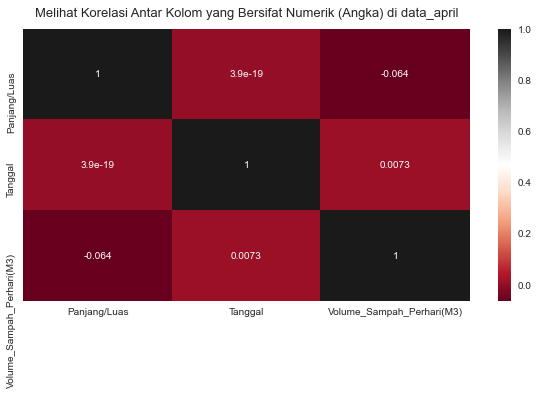

In [92]:
# Melihat korelasi antar kolom yang memiliki bersifat numerik
plt.figure(figsize=(10, 5))

korelasi_data_april = sns.heatmap(data_april.corr(), cmap="RdGy", annot=True)
korelasi_data_april.set_title("Melihat Korelasi Antar Kolom yang Bersifat Numerik (Angka) di data_april", 
                              fontsize=13, pad=13);

Grafik diatas dinamakan sebagai grafik heatmap atau grafik peta panas dengan menunjukkan nilai korelasi antar masing-masing kolom yang bersifat numerik sedangkan kategorik tidak. Cara membaca grafik ini yaitu membaca dari sumbu y ke sumbu x atau sebaliknya dengan memfokuskan/memperhatikan nilai yang ada di box persegi sebagai penanda nilai korelasinya. Contohnya adalah sebagai berikut:

1. Variabel "Panjang/Luas" yang ada di sumbu y memiliki nilai korelasi 1 dengan variabel yang sama (Panjang/Luas) yang berada di sumbu x. Sedangkan variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi -0.064 dengan variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu x. Hal tersebut menandakan tidak memiliki hubungan timbal-balik.
2. Variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu y memiliki nilai korelasi = 0.0073 dengan variabel Tanggal yang ada di sumbu x. Hal ini menandakan bahwasanya kedua variabel ini (Variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu y dengan variabel "Tanggal" di sumbu x) sedikit memiliki hubungan timbal balik walaupun penilaian dominannya cenderung tidak memiliki hubungan timbal-balik.


Jadi intinya setiap kolom-kolom yang ada di sumbu y (yang berada di sisi kiri) dibaca/diperhatikan setiap nilainya dengan kolom-kolom yang berada di sumbu x (yang berada di bawah). Untuk memudahkan dalam membedakan apakah nilai korelasinya bagus/tidak dapat dilihat dari indikator warna yang di sebelah paling kanan dari grafik heatmap. Semakin bagus nilai korelasinya maka warnanya menjadi hitam tetapi semakin buruk/kecil nilai korelasinya maka nilai warna pada box persegi di nilai tersebut menjadi warna merah menyala.

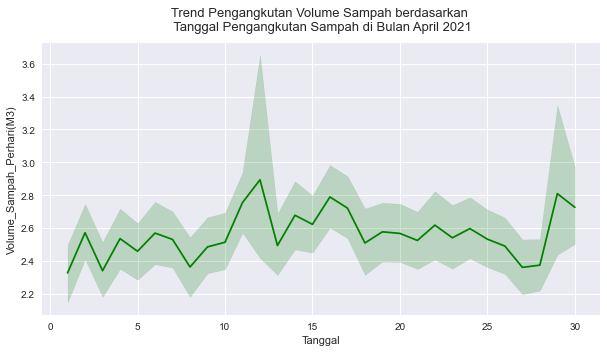

In [93]:
# Melihat trend dalam pengangkutan sampah per harinya berdasarkan tanggal pengangkutan
plt.figure(figsize=(10, 5))
    
sns.lineplot(x="Tanggal", y="Volume_Sampah_Perhari(M3)", color="green", data=data_april)
plt.title("Trend Pengangkutan Volume Sampah berdasarkan \n Tanggal Pengangkutan Sampah di Bulan April 2021", 
          fontsize=13, pad=13)
plt.show()

Dari grafik garis (Line plot) diatas menunjukkan intensitas pengangkutan sampah yang dilakukan oleh Dinas Lingkungan Hidup Provinsi DKI Jakarta di setiap hari pada bulan April tahun 2021.

Hasilnya adalah bahwa trend dalam pengangkutan volume sampah yang berhasil diangkut dari berbagai titik lokasi yang ada di kecamatan Provinsi DKI Jakarta cenderung mengalami kenaikan dan juga penurunan intensitas volume sampah selama bulan Maret tahun 2021. Namun jika diperhatikan secara teliti maka saya jadi dapat mengetahui bahwasanya sampah yang berhasil diangkut dari beberapa titik lokasi yang tersebar di kecamatan Provinsi DKI Jakarta pada bulan April tahun 2021 ini cenderung tidak meninggi dari pada bulan-bulan sebelumnya (Januari - Maret 2021).

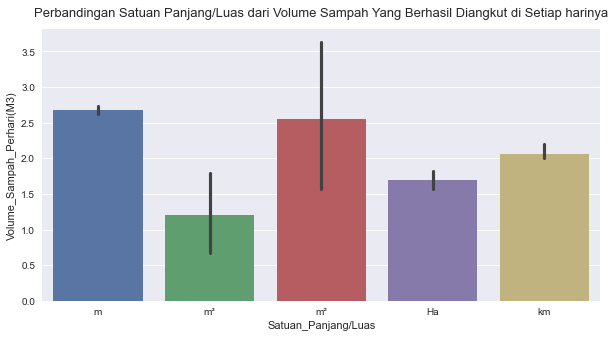

In [94]:
# Membandingkan nilai data di kolom "Satuan_Panjang/Luas" berdasarkan volume sampah yang berhasil diangkut per harinya
plt.figure(figsize=(10, 5))

sns.barplot(x="Satuan_Panjang/Luas", y="Volume_Sampah_Perhari(M3)", data=data_april)
plt.title("Perbandingan Satuan Panjang/Luas dari Volume Sampah Yang Berhasil Diangkut di Setiap harinya", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik batang dari hasil output diatas dapat diketahui dan diambil kesimpulan seperti:

1. Data yang memiliki nilai dominan dari kolom satuan panjang/luas yang dilihat berdasarkan volume sampah yang berhasil diangkut di setiap harinya adalah data satuan panjang yakni m yang disusul oleh nilai m².
2. Sedangkan nilai satuan panjang/luas yang memiliki nilai terkecil dalam hal volume sampah dalam setiap harinya adalah satuan m³.

Untuk susunan nilai dari yang terbanyak hingga terkecil adalah sebagai berikut:

- m².
- m.
- km.
- Ha.
- m³.

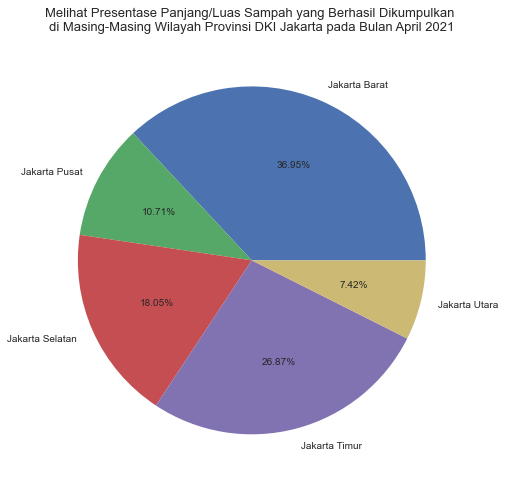

In [95]:
# Melihat komposisi masing-masing wilayah Provinsi DKI Jakarta berdasarkan panjang/luas sampah yang berhasil dikumpulkan
plt.figure(figsize=(10, 8))

data_pie_april = data_april.groupby("Wilayah")["Panjang/Luas"].count().reset_index()
plt.pie(data_pie_april["Panjang/Luas"], labels = data_pie_april["Wilayah"], autopct = "%.2f%%")
plt.title("Melihat Presentase Panjang/Luas Sampah yang Berhasil Dikumpulkan \n"
          "di Masing-Masing Wilayah Provinsi DKI Jakarta pada Bulan April 2021", 
          fontsize=13, pad=13)
plt.show()

Grafik Pie merupakan sebuah grafik yang berfungsi untuk menunjukkan komposisi dari data yang bersifat kategorik dengan memperlihatkan nilai presentase dari masing-masing data dan jumlah total presentase tersebut harus 100% (tidak boleh lebih/kurang).

Berdasarkan grafik pie diatas maka saya dapat menganalisis komposisi data dari kolom Wilayah berdasarkan perhitungan keseluruhan dari kolom Panjang/Luas yang dihitung berdasarkan wilayah dari Provinsi DKI Jakarta. Kolom Panjang/Luas ini merupakan sebuah kolom yang menandakan seberapa luasnya area penanganan sampah yang dilakukan oleh Dinas Lingkungan Hidup (DLH) Provinsi DKI Jakarta. Berikut adalah hasil analisa dari saya:

1. Wilayah yang memiliki area penanganan yang paling luas dalam menangani sampah di Provinsi DKI Jakarta adalah wilayah Jakarta Barat yang memiliki nilai presentase sebesar 36.95%.
2. Sedangkan wilayah Jakarta Utara memiliki area penanganan sampah yang paling kecil dan sempit diantara wilayah-wilayah yang lain (seperti wilayah Jakarta Barat (36.95%), Jakarta Timur (26.87%), Jakarta Selatan (18.05%), dan Jakarta Pusat (10.71%)) dengan total nilai presentase hanya sebesar 7.42% dalam sisi luas area penanganan sampah.

## 4. Data Modelling

### 4.1. Pra-Pemodelan

In [96]:
# Melakukan pemisahan data menjadi variabel independen (x) dan variabel dependen (y)
x = data_april[["Tanggal"]]

y = data_april["Volume_Sampah_Perhari(M3)"]

#### 4.1.1. Menggunakan Split Validation dalam Melakukan Prediksi Model Regresi Linear (4.2) dan Regresi Random Forest (4.3)

In [97]:
# Proses split validation yaitu membagi variabel independen dan dependen menjadi data training dan data testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Penjelasan dari proses split validation:

1. x: Merupakan sebuah variabel independen atau variabel yang dipengaruhi dari variabel dependen
2. y: Merupakan sebuah variabel dependen atau variabel yang mempengaruhi variabel independen. Variabel y juga biasa dikenal sebagai label prediksi.
3. test_size: Nilai presentase atau komposisi dari dalam membagi data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.

In [98]:
# Melihat ukuran dimensi dari kolom dan rows dari data training dan data testing
print("Jumlah Rows dan Kolom di Data Training Setelah Dilakukan Split Validation: ", x_train.shape, y_train.shape)
print("Jumlah Rows dan Kolom di Data Testing Setelah Dilakukan Split Validation: ", x_test.shape, y_test.shape)

Jumlah Rows dan Kolom di Data Training Setelah Dilakukan Split Validation:  (34296, 1) (34296,)
Jumlah Rows dan Kolom di Data Testing Setelah Dilakukan Split Validation:  (8574, 1) (8574,)


In [99]:
# Melakukan scaling data (training & testing) dengan standard scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

StandardScaler merupakan salah satu dari proses scaling data ketika ingin melakukan tahapan pemodelan machine learning. StandardScaler akan melakukan proses standarisasi data yang ada di kolom fitur dengan mengurangi nilai mean (rata-rata) dan kemudian nilai tersebut akan diskalakan ke varians unit. Nilai yang ada di varians unit tersebut akan membagi semua nilai yang ada dengan nilai standar deviasi.

StandardScaler akan membuat nilai mean (rata-rata) yang telah di observasi menjadi 0 sedangkan nilai standar deviasinya menjadi 1. Begitu pula dengan nilai varians yang menjadi 1 karena nilai varians = nilai standar deviasi yang di kuadratkan. Rumus dari scaling data StandardScaler adalah sebagai berikut:

x_scaled = x - mean(x) / Standard Deviation

In [100]:
# Melihat hasil dari proses scalling dengan standardscaler
print("Nilai Scaling dari Hasil StandardScaler pada Data Testing: \n", x_test)

print("\n", "----------------------------------------------------------------------------", "\n")

print("Nilai Scaling dari Hasil StandardScaler pada Data Training: \n", x_train)

Nilai Scaling dari Hasil StandardScaler pada Data Testing: 
 [[ 1.44075594]
 [ 0.40078201]
 [-1.44806053]
 ...
 [-0.52363926]
 [ 0.40078201]
 [ 0.63188733]]

 ---------------------------------------------------------------------------- 

Nilai Scaling dari Hasil StandardScaler pada Data Training: 
 [[-0.63450155]
 [-1.44321084]
 [-1.32768095]
 ...
 [-0.40344175]
 [-0.75003145]
 [ 0.40526754]]


### 4.2. Regresi Linear

In [101]:
# Memanggil model regresi linear dari library sklearn dan kemudian melatihnya dengan data training
from sklearn.linear_model import LinearRegression

split_linear_regression_apr = LinearRegression()
split_linear_regression_apr.fit(x_train, y_train)

# Melihat nilai terbaik beserta parameter dari model regresi linear
print(split_linear_regression_apr.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


Berdasarkan hasil output terkait pencarian parameter terbaik dari model regresi linear didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter copy_X, nilai terbaik dari parameter ini adalah True.
2. Di dalam parameter fit_intercept, parameter ini memiliki nilai terbaik yakni nilai True.
3. Parameter n_jobs tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
4. Nilai terbaik dari parameter normalize adalah deprecated.
5. Sedangkan nilai terbaik dari parameter positive adalah False.

Nilai-nilai tersebut merupakan nilai terbaik dari model regresi linear yang dimunculkan secara otomatis sebab dari awal regresi linear memang telah memiliki nilai-nilai diatas. Nilai-nilai tersebut bisa dilihat di dokumentasi scikit learn dalam pembahasan regresi linear.

In [102]:
# Melihat nilai prediksi dari data training dan data testing setelah dilakukan proses tuning hyperparameters
print("----------------Nilai Prediksi dari Data Testing------------------")
pred_test_linear_apr = split_linear_regression_apr.predict(x_test)
print(pred_test_linear_apr)

print("\n----------------Nilai Prediksi dari Data Training-----------------")
pred_train_linear_apr = split_linear_regression_apr.predict(x_train)
print(pred_train_linear_apr)

----------------Nilai Prediksi dari Data Testing------------------
[2.58563739 2.56473738 2.5275818  ... 2.54615959 2.56473738 2.56938183]

----------------Nilai Prediksi dari Data Training-----------------
[2.54393163 2.52767927 2.53000103 ... 2.54857516 2.54160986 2.56482752]


In [103]:
# Melihat hasil prediksi regresi linear dari data testing dan juga data training

print("----------------------------Data Testing dari Split Validation----------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, pred_test_linear_apr))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test, pred_test_linear_apr), "\n")
#print("Nilai Metric Mean Squared Log Error di Data Test Adalah: ", "%.2f" % mean_squared_log_error(y_test, pred_test_linear))

print("----------------------------Data Training dari Split Validation---------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, pred_train_linear_apr))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, pred_train_linear_apr))
#print("Nilai Metric Mean Squared Log Error Adalah: ", "%.2f" % mean_squared_log_error(y_train, pred_train_linear))

----------------------------Data Testing dari Split Validation----------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  2.21
Nilai Metric Mean Squared Error di Data Test adalah:  24.07 

----------------------------Data Training dari Split Validation---------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  2.16
Nilai Metric Mean Squared Error di Data Train adalah:  18.81


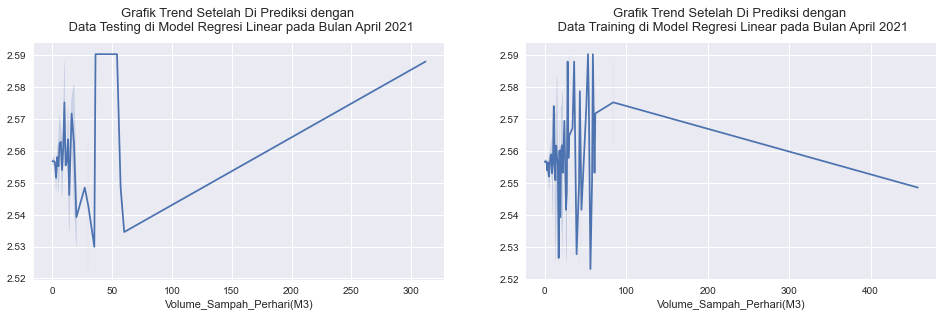

In [104]:
# Membuat grafik untuk melihat trend data dari volume pengangkutan sampah setelah dilakukan proses pemodelan regresi linear
plt.figure(figsize=(25, 20))

# Grafik untuk melihat trend data testing setelah dilakukan proses pemodelan regresi linear
plt.subplot(4, 3, 1)
sns.lineplot(y_test, pred_test_linear_apr)
plt.title("Grafik Trend Setelah Di Prediksi dengan \n Data Testing di Model Regresi Linear pada Bulan April 2021", 
          fontsize=13, pad=13)

# Grafik untuk melihat trend data training setelah dilakukan proses pemodelan regresi linear
plt.subplot(4, 3, 2)
sns.lineplot(y_train, pred_train_linear_apr)
plt.title("Grafik Trend Setelah Di Prediksi dengan \n Data Training di Model Regresi Linear pada Bulan April 2021", 
          fontsize=13, pad=13)
plt.show()

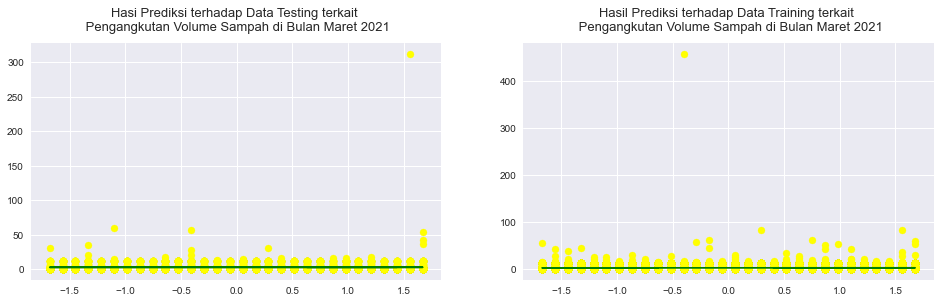

In [105]:
"""
Melihat korelasi/hubungan keterkaitan terhadap data testing dan data training 
setelah dilakukan proses prediksi menggunakan algoritma regresi linear
"""
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
plt.scatter(x_test, y_test, color="yellow")
plt.plot(x_test, pred_test_linear_apr, color="green")
plt.title("Hasi Prediksi terhadap Data Testing terkait \n Pengangkutan Volume Sampah di Bulan Maret 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
plt.scatter(x_train, y_train, color="yellow")
plt.plot(x_train, pred_train_linear_apr, color="green")
plt.title("Hasil Prediksi terhadap Data Training terkait \n Pengangkutan Volume Sampah di Bulan Maret 2021", 
          fontsize=13, pad=13)
plt.show()


#### 4.1.2. Menggunakan K-Fold Cross Validation dalam Melakukan Prediksi Model Regresi Linear

In [106]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold = KFold(n_splits=20, shuffle=True)
kfold

KFold(n_splits=20, random_state=None, shuffle=True)

K-Fold Cross Validation memiliki 3 parameters yaitu n_splits, shuffle, dan random_state. Berikut adalah penjelasan dari parameters di teknik k-fold cross validation adalah sebagai berikut:

1. n_splits: parameter ini berfungsi sebagai lipatan dalam memvalidasi sebuah data. Jika n_split yang dibuat 5 maka terdapat 5 iterasi dalam memvalidasi serta juga melatih data sebanyak 5x pemrosesan dan setiap iterasi tersebut akan memiliki 5 baris untuk pengujiannya.
2. shuffle: parameter ini berfungsi untuk mengacak data sebelum dipecah ke beberapa iterasi (sesuai n_splits yang dibuat).

In [107]:
# Membuat model regresi linear + nilai parameter default yang kemudian akan diimplementasikan ke teknik k-fold cross validation

kfold_linear_regression_apr = LinearRegression()
kfold_linear_regression_apr.fit(x_train, y_train)

LinearRegression()

In [108]:
# Melihat metrics-metrics yang bisa digunakan untuk memprediksi model machine learning
import sklearn

print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Diatas adalah metrics-metrics yang bisa digunakan dalam melihat hasil prediksi yang telah dibangun oleh model machine learning. Untuk pengujian kali ini saya akan menggunakan metrics yang bernama neg_mean_absolute_error dan neg_mean_squared_error.

In [109]:
# Memanggil library cross_val_score untuk memvalidasi data training dan data test menggunakan metrics MAE & MSE

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_apr = cross_val_score(kfold_linear_regression_apr, x_train, y_train, 
                                            scoring="neg_mean_absolute_error", cv=kfold, n_jobs=1)

mae_score_kfold_test_apr = cross_val_score(kfold_linear_regression_apr, x_test, y_test, 
                                           scoring="neg_mean_absolute_error", cv=kfold, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_apr = cross_val_score(kfold_linear_regression_apr, x_train, y_train, 
                                            scoring="neg_mean_squared_error", cv=kfold, n_jobs=1)

mse_score_kfold_test_apr = cross_val_score(kfold_linear_regression_apr, x_test, y_test, 
                                           scoring="neg_mean_squared_error", cv=kfold, n_jobs=1)

In [110]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_apr, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_apr, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_apr, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_apr)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-2.40753206 -2.11791486 -2.22399921 -2.12868169 -2.12153251 -2.13789773
 -2.2335364  -2.09991359 -2.1077858  -2.14979695 -2.13684239 -2.21102318
 -2.19210043 -2.07461672 -2.00378755 -2.07972493 -2.21174929 -2.09866385
 -2.22230309 -2.27341001] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-2.21032883 -2.11930929 -2.66742858 -2.14763347 -2.31419084 -2.16421928
 -2.36690953 -2.28063766 -2.31922561 -2.27665567 -2.19822538 -2.21075453
 -2.22634346 -2.22637693 -2.12883838 -2.22570621 -2.1846056  -2.10021679
 -2.0739223  -2.06780578] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [ -11.52275151  -15.25525058  -11.20152673  -11.41193333  -13.51268736
  -15.75153053   -9.89492619  -11.63087715  -15.4150611   -12.88554224
  -12.85748152  -13.73855633  -11.50387576 -133.38818651  -13.08058444
  -11.22833464  -17.81924872  -12.60257188  -10.4705222   -11.14777225] 

Skor Setia

In [111]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_train_apr)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_apr)), "\n")

print("---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_apr)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_apr)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 2.16 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 24.08  

---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 2.16 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 18.82 


### 4.3. Regresi Random Forest

In [112]:
# Memanggil model regresi random forest dari library sklearn
from sklearn.ensemble import RandomForestRegressor

split_randomforest_regression_apr = RandomForestRegressor()
split_randomforest_regression_apr.fit(x_train, y_train)

# Melihat parameter dari regresi random forest beserta nilai terbaik dari masing-masing parameter
print(split_randomforest_regression_apr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Berdasarkan hasil output terkait pencarian parameter terbaik dari model regresi linear didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter bootstrap, nilai terbaik dari parameter ini adalah True.
2. Di dalam parameter ccp_alpha, parameter ini memiliki nilai terbaik yakni nilai 0.0.
3. Parameter criterion memiliki nilai terbaik yakni squared_error.
4. Parameter max_depth tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
5. Di dalam parameter max_features, parameter ini memiliki nilai terbaik yakni nilai auto.
6. Di dalam parameter max_leaf_nodes tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
7. Di dalam parameter max_samples tidak memiliki nilai karena nilai yang dimunculkan adalah None (Kosong).
7. Di dalam parameter min_impurity_decrease, parameter ini memiliki nilai terbaik yakni nilai 0.0.
8. Nilai terbaik dari parameter min_samples_leaf adalah 1.
9. Nilai terbaik dari parameter min_samples_split adalah 2.
10. Pada parameter min_weight_fraction_leaf, nilai yang muncul adalah nilai 0.0.
11. Di parameter n_estimators, nilai yang muncul pada parameter ini adalah 100.
12. Pada parameter n_jobs, nilai yang muncul adalah nilai None.
13. Pada parameter oob_score, nilai yang muncul adalah nilai False.
14. Pada parameter random_state, nilai yang muncul adalah nilai None.
15. Di parameter verbose, nilai yang muncul pada parameter ini adalah 0.
16. Sedangkan nilai yang muncul dari parameter warm_start adalah False.

Nilai-nilai tersebut merupakan nilai terbaik dari model regresi random forest yang dimunculkan secara otomatis sebab dari awal regresi random forest telah memiliki nilai-nilai diatas sebagai nilai default. Nilai-nilai tersebut bisa dilihat di dokumentasi scikit learn dalam pembahasan regresi random forest (random forest regressor).

In [113]:
# Melihat nilai prediksi dari data training dan data testing setelah dilakukan proses pencarian nilai parameters terbaik
print("----------------Nilai Prediksi dari Data Testing------------------")
pred_test_randomforest_apr = split_randomforest_regression_apr.predict(x_test)
print(pred_test_randomforest_apr)

print("\n---------------Nilai Prediksi dari Data Training-----------------")
pred_train_randomforest_apr = split_randomforest_regression_apr.predict(x_train)
print(pred_train_randomforest_apr)

----------------Nilai Prediksi dari Data Testing------------------
[2.39162207 2.60974863 2.37108749 ... 2.71278468 2.60974863 2.48193039]

---------------Nilai Prediksi dari Data Training-----------------
[2.47184652 2.37108749 2.47181068 ... 2.81203581 2.5251593  2.60974863]


In [114]:
# Melihat hasil prediksi regresi random forest dari data testing dan juga data training

print("----------------------------Data Testing dari Split Validation----------------------------")
print("Nilai Metric Mean Absolute Error di Data Test adalah: ", "%.2f" % mean_absolute_error
      (y_test, pred_test_randomforest_apr))
print("Nilai Metric Mean Squared Error di Data Test adalah: ", "%.2f" % mean_squared_error
      (y_test,  pred_test_randomforest_apr), "\n")
#print("Nilai Metric Mean Squared Log Error di Data Test Adalah: ", "%.2f" % mean_squared_log_error(y_test, pred_test_linear))

print("----------------------------Data Training dari Split Validation---------------------------")
print("Nilai Metric Mean Absolute Error di Data Train adalah: ", "%.2f" % mean_absolute_error
      (y_train, pred_train_randomforest_apr))
print("Nilai Metric Mean Squared Error di Data Train adalah: ", "%.2f" % mean_squared_error
      (y_train, pred_train_randomforest_apr))
#print("Nilai Metric Mean Squared Log Error Adalah: ", "%.2f" % mean_squared_log_error(y_train, pred_train_linear))

----------------------------Data Testing dari Split Validation----------------------------
Nilai Metric Mean Absolute Error di Data Test adalah:  2.20
Nilai Metric Mean Squared Error di Data Test adalah:  24.04 

----------------------------Data Training dari Split Validation---------------------------
Nilai Metric Mean Absolute Error di Data Train adalah:  2.16
Nilai Metric Mean Squared Error di Data Train adalah:  18.80


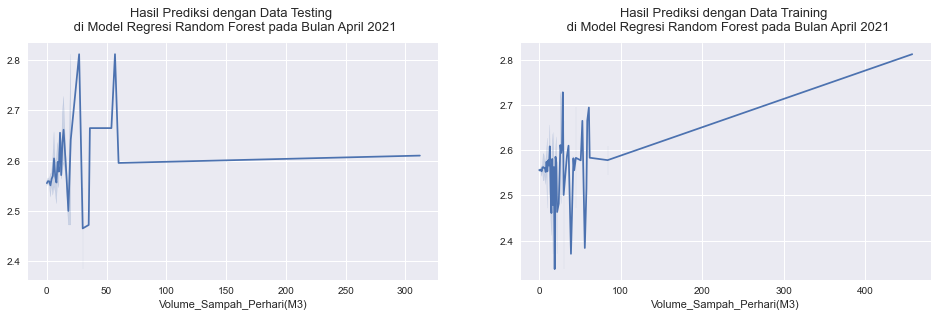

In [115]:
# Membuat grafik untuk melihat trend data dari volume pengangkutan sampah setelah melalui proses pemodelan regresi random forest
plt.figure(figsize=(25, 20))

# Grafik untuk melihat trend data testing setelah dilakukan proses pemodelan regresi random forest
plt.subplot(4, 3, 1)
sns.lineplot(y_test, pred_test_randomforest_apr)
plt.title("Hasil Prediksi dengan Data Testing \n di Model Regresi Random Forest pada Bulan April 2021", 
          fontsize=13, pad=13)

# Grafik untuk melihat trend data training setelah dilakukan proses pemodelan regresi linear
plt.subplot(4, 3, 2)
sns.lineplot(y_train, pred_train_randomforest_apr)
plt.title("Hasil Prediksi dengan Data Training \n di Model Regresi Random Forest pada Bulan April 2021", 
          fontsize=13, pad=13)
plt.show()

#### 4.1.3. Menggunakan K-Fold Cross Validation dalam Melakukan Prediksi Model Regresi Random Forest

In [116]:
# Memanggil library K-Fold Cross Validation yang telah dipanggil diawal pemrosesan
kfold = KFold(n_splits=20, shuffle=True)
kfold

KFold(n_splits=20, random_state=None, shuffle=True)

K-Fold Cross Validation memiliki 3 parameters yaitu n_splits, shuffle, dan random_state. Berikut adalah penjelasan dari parameters di teknik k-fold cross validation adalah sebagai berikut:

1. n_splits: parameter ini berfungsi sebagai lipatan dalam memvalidasi sebuah data. Jika n_split yang dibuat 5 maka terdapat 5 iterasi dalam memvalidasi serta juga melatih data sebanyak 5x pemrosesan dan setiap iterasi tersebut akan memiliki 5 baris untuk pengujiannya.
2. shuffle: parameter ini berfungsi untuk mengacak data sebelum dipecah ke beberapa iterasi (sesuai n_splits yang dibuat).

In [117]:
# Membuat model regresi random forest untuk k-fold cross validation dengan menggunakan nilai-nilai parameter default

kfold_randomforest_regression_apr = RandomForestRegressor()
kfold_randomforest_regression_apr.fit(x_train, y_train)

RandomForestRegressor()

In [118]:
"""
Memanggil library cross_val_score untuk memvalidasi data training dan data test di model regresi random forest 
dengan menggunakan metrics MAE & MSE
"""

# Metric MAE untuk Data Training dan Data Testing
mae_score_kfold_train_apr = cross_val_score(kfold_randomforest_regression_apr, x_train, y_train, 
                                            scoring="neg_mean_absolute_error", cv=kfold, n_jobs=1)

mae_score_kfold_test_apr = cross_val_score(kfold_randomforest_regression_apr, x_test, y_test, 
                                           scoring="neg_mean_absolute_error", cv=kfold, n_jobs=1)

# Metric MSE untuk Data Training dan Data Testing
mse_score_kfold_train_apr = cross_val_score(kfold_randomforest_regression_apr, x_train, y_train, 
                                            scoring="neg_mean_squared_error", cv=kfold, n_jobs=1)

mse_score_kfold_test_apr = cross_val_score(kfold_randomforest_regression_apr, x_test, y_test, 
                                           scoring="neg_mean_squared_error", cv=kfold, n_jobs=1)

In [119]:
# Melihat nilai dari setiap iterasi dari metrics mean absolute error dan mean squared error

print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mae_score_kfold_train_apr, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mae_score_kfold_test_apr, "\n")
print("Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: \n", mse_score_kfold_train_apr, "\n")
print("Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: \n", mse_score_kfold_test_apr)

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [-2.1727185  -2.1864193  -2.07513315 -2.03028679 -2.21396186 -2.11428959
 -2.07550649 -2.1174886  -2.19953502 -2.21276632 -2.14819229 -2.1744437
 -2.21306133 -2.19106751 -2.15315863 -2.3958596  -2.07640749 -2.04985253
 -2.2187174  -2.2056142 ] 

Skor Setiap Iterasi Data Testing dari Metrics Mean Absolute Error: 
 [-2.3504791  -2.02541815 -2.50103757 -2.0825325  -2.08463043 -2.10657215
 -2.28447378 -2.32453682 -2.18105753 -2.06493303 -2.12486456 -2.04344901
 -2.10062104 -2.22798055 -2.17837307 -2.25474322 -2.10216484 -2.31738802
 -2.28187776 -2.84349457] 

Skor Setiap Iterasi Data Training dari Metrics Mean Absolute Error: 
 [ -13.55260584  -12.3444916   -10.90563952 -132.60989217  -10.25250477
  -12.34349365  -15.58640113  -10.78080083  -17.23459054  -17.64700246
  -12.24378514  -12.06674621  -12.33074794  -13.43490351  -10.92154828
  -10.54789961  -12.68281095  -13.30289625  -11.07332576  -14.86603088] 

Skor Setiap

In [120]:
# Melihat hasil prediksi data test dan data train dengan metric MAE & MSE dari hasil K-Fold Cross Validation

print("---------------------------------Data Testing K-Fold----------------------------------")
print("Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mae_score_kfold_test_apr)))
print("Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                      (mse_score_kfold_test_apr)))

print("\n", "---------------------------------Data Training K-Fold----------------------------------")
print("Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mae_score_kfold_train_apr)))
print("Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: %.2f " % np.mean(np.absolute
                                                                                       (mse_score_kfold_train_apr)))

---------------------------------Data Testing K-Fold----------------------------------
Nilai Prediksi dari Data Test Menggunakan Metrics MAE adalah: 2.22 
Nilai Prediksi dari Data Test Menggunakan Metrics MSE adalah: 24.14 

 ---------------------------------Data Training K-Fold----------------------------------
Nilai Prediksi dari Data Train Menggunakan Metrics MAE adalah: 2.16 
Nilai Prediksi dari Data Train Menggunakan Metrics MSE adalah: 18.84 
